In [2]:
from pythonds.graphs import Graph
import numpy as np

def buildGraph(wordFile):
    d = {}
    g = Graph()
    wfile = open(wordFile,'r')
    # create buckets of words that differ by one letter
    for line in wfile:
        word = line[:-1]
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i+1:]
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
    # add vertices and edges for words in the same bucket
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    g.addEdge(word1,word2)
    count_isolated = 0
    wfile = open(wordFile,'r')
    for line in wfile:
        word = line[:-1]
        flag = 0
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i+1:]
            if len(d[bucket]) > 1:
                flag = 1
        if flag == 0:
            count_isolated+=1
    return g, count_isolated
g, count_isolated = buildGraph('words5.txt')
print("number of isolated nodes:", count_isolated)


number of isolated nodes: 659


In [5]:
degree_dict = {}
for v in g:
    if len(v.getConnections()) in degree_dict:
        degree_dict[len(v.getConnections())].append(v.id)
    else:
        degree_dict[len(v.getConnections())] = [v.id]
max_degree = np.max(list(degree_dict.keys()))
print("Maximum degree: ",max_degree)
print(degree_dict[max_degree])

dict_keys([<pythonds.graphs.adjGraph.Vertex object at 0x000002870B7AA898>, <pythonds.graphs.adjGraph.Vertex object at 0x000002870B791710>, <pythonds.graphs.adjGraph.Vertex object at 0x000002870B791898>])
Maximum degree:  23
['cares']
3


In [156]:
from pythonds.graphs import Graph, Vertex
from pythonds.basic import Queue

def bfs(g,start):
    start.setDistance(0)
    start.setPred(None)
    vertQueue = Queue()
    vertQueue.enqueue(start)
    while (vertQueue.size() > 0):
    currentVert = vertQueue.dequeue()
    for nbr in currentVert.getConnections():
        if (nbr.getColor() == 'white'):
        nbr.setColor('gray')
        nbr.setDistance(currentVert.getDistance() + 1)
        nbr.setPred(currentVert)
        vertQueue.enqueue(nbr)
    currentVert.setColor('black')
bfs(g, g.getVertex('study'))

In [157]:
def traverse(y):
    x = y
    while (x.getPred()):
        print(x.getId())
        x = x.getPred()
    print(x.getId())

traverse(g.getVertex('zooms'))

zooms
booms
boors
boars
soars
stars
stabs
stubs
studs
study


In [159]:
distance_dict = {}
for v in g:
    if v.getColor() == 'black':
        if v.getDistance() in distance_dict:
            distance_dict[v.getDistance()].append(v.id)
        else:
            distance_dict[v.getDistance()] = [v.id]
max_distance = np.max(list(distance_dict.keys()))
print("Maximum distance: ",max_distance)
print(distance_dict[max_distance])
    

Maximum distance:  21
['retry']


In [160]:
from pythonds.graphs import Graph
import numpy as np
import itertools
from collections import Counter
import matplotlib.pyplot as plt

def MakeSet(x):
    x.parent = x
    x.rank   = 0

def Union(x, y):
    xRoot = Find(x)
    yRoot = Find(y)
    if xRoot.rank > yRoot.rank:
        yRoot.parent = xRoot
    elif xRoot.rank < yRoot.rank:
        xRoot.parent = yRoot
    elif xRoot != yRoot: # Unless x and y are already in same set, merge them
        yRoot.parent = xRoot
        xRoot.rank = xRoot.rank + 1

def Find(x):
     if x.parent == x:
        return x
     else:
        x.parent = Find(x.parent)
        return x.parent
    
class Node:
    def __init__ (self, label):
        self.label = label
    def __str__(self):
        return self.label 
    
def buildConnectedComponents(wordFile):
    d = {}
    g = Graph()
    words = []
    wfile = open(wordFile,'r')
    # create buckets of words that differ by one letter
    for line in wfile:
        word = line[:-1]
        words.append(word)
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i+1:]
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
    l = dict((ch, Node(ch)) for ch in words)
    [MakeSet(node) for node in l.values()]       #starting with every object in its own set
#     print("objects labels:\t\t\t", [str(i) for i in l.values()])
    sets =  [str(Find(x)) for x in l.values()]
#     print("set representatives:\t\t", sets)
#     print("number of disjoint sets:\t", len([i for i in itertools.groupby(sets)]))
#     # add vertices and edges for words in the same bucket
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    Union(l[word1],l[word2])             
    sets2 = [str(Find(x)) for x in l.values()]
#     print("set representatives:\t\t", sets2)
    counts = Counter(sets2)
    print("number of connected components:\t",len(dict(counts).keys()))
    Listoftuples_freq = sorted(counts.items(),key = lambda x:x[1], reverse=True)

    list_sorted_freq = Listoftuples_freq



    x_val = [x[0] for x in list_sorted_freq]
    y_val = [x[1] for x in list_sorted_freq]
    v = list(y_val)
    plt.plot(v)
    plt.xlabel("Number of connected components")
    plt.ylabel("Size")
    plt.show()
    

number of connected components:	 810


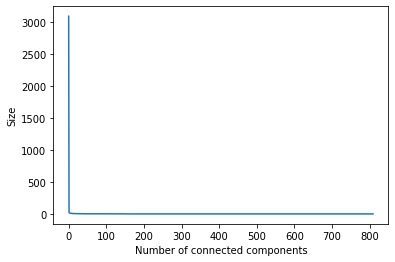

In [161]:
buildConnectedComponents('words5.txt')

In [4]:
def dfs(g):
    for aVertex in g:
        aVertex.setColor('white')
        aVertex.setPred(-1)
    g.getVertex('study').setDistance(0)
    dfsvisit(g, g.getVertex('study'), 0)
#     for aVertex in g:
#         if aVertex.getColor() == 'white':
#             dfsvisit(aVertex)

def dfsvisit(g,startVertex, time):
    startVertex.setColor('gray')
    time += 1
    startVertex.setDiscovery(time)
    for nextVertex in startVertex.getConnections():
        if nextVertex.getColor() == 'white':
            nextVertex.setDistance(startVertex.getDistance() + 1)
            nextVertex.setPred(startVertex)
            dfsvisit(g, nextVertex, time)
    startVertex.setColor('black')
    time += 1
    startVertex.setFinish(time)
g, count_isolated = buildGraph('words5.txt')
dfs(g)
    distance_dict = {}
    for v in g:
        if v.getColor() == 'black':
            if v.getDistance() in distance_dict:
                distance_dict[v.getDistance()].append(v.id)
            else:
                distance_dict[v.getDistance()] = [v.id]
    # print(distance_dict)
    max_distance = np.max(list(distance_dict))
    print("Maximum distance: ",max_distance)
    print(distance_dict[max_distance])
    print(distance_dict)

Maximum distance:  1654
['glare', 'shady']
{881: ['aback', 'flack'], 880: ['alack'], 652: ['abide', 'olive', 'amigo', 'scene'], 651: ['amide', 'alive', 'amino', 'scone'], 653: ['aside', 'abode', 'scent'], 654: ['anode', 'above', 'scant'], 1639: ['acorn', 'sworn'], 1638: ['scorn', 'thorn'], 1640: ['adorn', 'sword'], 55: ['added'], 54: ['aided', 'andes'], 56: ['adder'], 57: ['odder'], 58: ['udder', 'older'], 60: ['aider'], 59: ['alder', 'order', 'olden', 'under'], 1642: ['adobe', 'award', 'spore', 'shard', 'swarm'], 1641: ['adore', 'sward', 'swore'], 624: ['after', 'astir', 'slabs', 'rater', 'inner', 'layer'], 625: ['alter', 'blabs', 'payer'], 623: ['aster', 'mater', 'infer', 'laxer', 'latex', 'scabs'], 126: ['bided'], 127: ['sided', 'bidet'], 130: ['aimed'], 129: ['aired'], 53: ['aides'], 61: ['cider'], 62: ['eider'], 63: ['hider', 'elder'], 64: ['rider'], 65: ['sider'], 66: ['wider'], 509: ['aimer'], 52: ['bides'], 265: ['hides', 'widen'], 266: ['rides'], 267: ['sides'], 268: ['tides']